In [1]:
import pandas as pd  # Data manipulation.
import numpy as np   # Numerical operations.
import seaborn as sns # Data visualization.
import matplotlib.pyplot as plt # Plotting library.

import warnings
warnings.filterwarnings('ignore') # Suppress warning messages.

## **Raw_Data**

In [2]:
# Load mobile phone price data from CSV
raw_data = pd.read_csv("Mobile phone price.csv")
# Resource : https://www.kaggle.com/datasets/rkiattisak/mobile-phone-price

In [3]:
import re

# This function Applicable Here Only RAM, Storage, Price ($) and Screen Size (inches) Features
def getting_num(series):
    new_series = pd.Series()
    for i in range(0,len(series)-1):
        value = series[i]
        pattern = "[0-9]+"
        l = re.findall(pattern,value)
        new_series[i] = int(l[0])
    return new_series
raw_data["RAM "] = getting_num(raw_data["RAM "])
raw_data["Storage "] =  getting_num(raw_data["Storage "])
raw_data['Price ($)'] = getting_num(raw_data['Price ($)'])
raw_data['Screen Size (inches)'] = getting_num(raw_data['Screen Size (inches)'])

# Here This Function applicable only Camera (MP)
def getting_avg(series):
  new_series = pd.Series()
  for i in range(len(series)):
    l = list(getting_num(series[i].split("+")))
    avg = round(np.average(l),2)
    new_series[i] = avg
  return new_series
raw_data['Camera (MP)'] = getting_avg(raw_data['Camera (MP)'])

In [4]:
# Features to analyze.
l = ['Camera (MP)',"RAM ","Storage ",'Price ($)']
for i in l:
  # Print unique value count for each feature.
  print(f"{i} \t :  {len(raw_data[i].unique())}\t")

Camera (MP) 	 :  57	
RAM  	 :  9	
Storage  	 :  6	
Price ($) 	 :  59	


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encode 'Brand' column to numerical values.
raw_data['Brand'] = le.fit_transform(raw_data['Brand'])
# Display count of each encoded brand.
raw_data['Brand'].value_counts()

Brand
12    79
15    67
10    56
11    43
14    35
0     30
8     28
7     23
9     15
5     12
4      7
1      4
6      3
2      3
13     1
3      1
Name: count, dtype: int64

## **Data**

In [6]:
# Create final dataset by dropping the 'Model' column.
data = raw_data.drop("Model",axis=1)

In [7]:
# Check for and display the count of missing values in each column.
data.isnull().sum()

Brand                     0
Storage                   1
RAM                       1
Screen Size (inches)      1
Camera (MP)               9
Battery Capacity (mAh)    0
Price ($)                 1
dtype: int64

In [8]:
# Remove rows with missing values directly from the DataFrame.
data.dropna(inplace=True)

In [9]:
# To Create Independent and Dependent Variable
# Features: all columns except 'Price ($)'.
X = data.drop("Price ($)",axis=1)
# Target: 'Price ($)' column.
y = data['Price ($)']

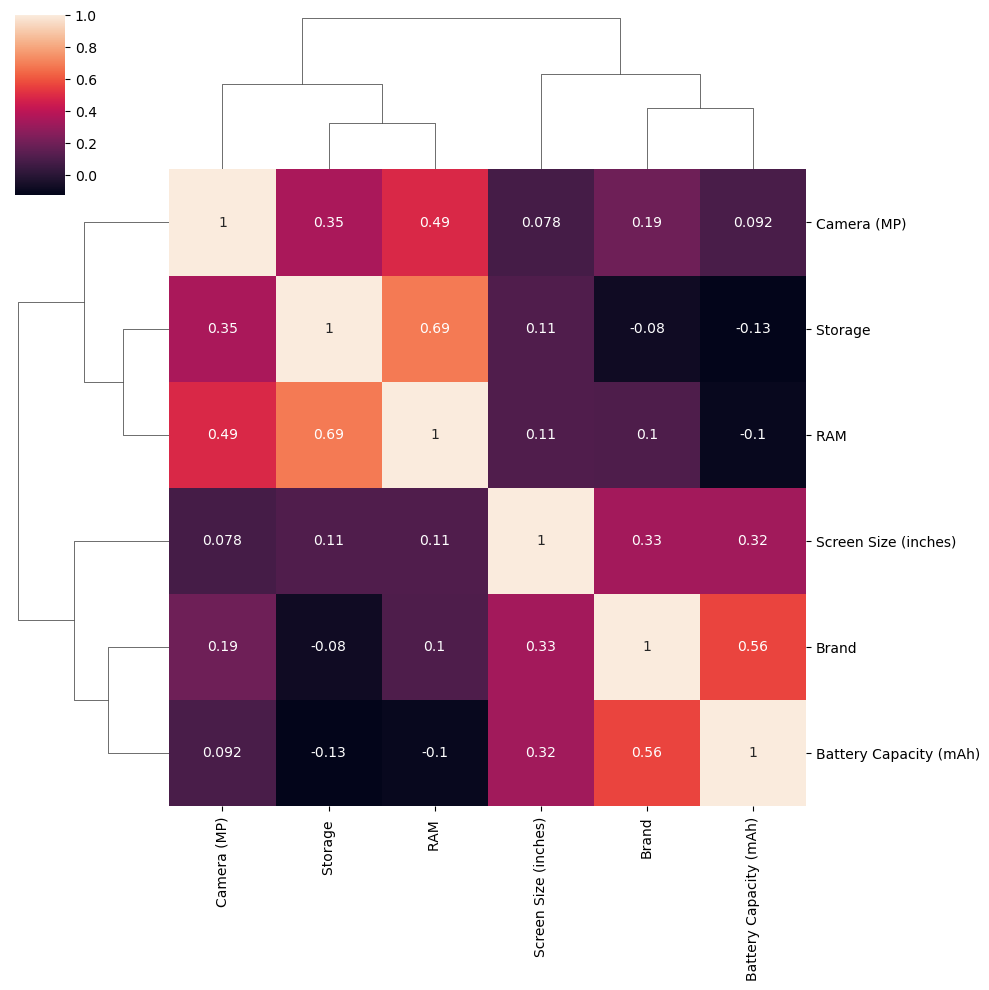

In [10]:
# Visualize feature correlation using a clustered heatmap.
sns.clustermap(X.corr(),annot=True)
plt.show()

In [11]:
# Training And Testing Split
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### **Multiple Linear Regression**

In [12]:
# Linear Regression
from sklearn.linear_model import LinearRegression

params_liner = {
    'fit_intercept' : [True,False], # Parameters for tuning intercept fitting.
    'positive': [True, False]  # Parameters for enforcing positive coefficients.
    }
# Instantiate Linear Regression model (without training).
LinearRegression()

LinearRegression()

In [13]:
# GridSearchCV automates hyperparameter tuning by exhaustively searching a predefined grid, using cross-validation to find the optimal model configuration.
from sklearn.model_selection import GridSearchCV
# Set up GridSearchCV for hyperparameter tuning.
grid_liner = GridSearchCV(LinearRegression(),param_grid=params_liner,cv=5,verbose=True)
grid_liner

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             verbose=True)

In [14]:
# Train the model with optimal hyperparameters found by GridSearchCV.
grid_liner.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             verbose=True)

In [15]:
y_pred = grid_liner.best_estimator_.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print(f"R2 Score : {r2_score(y_test,y_pred)}")
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")
print(f"MAPE : {mean_absolute_percentage_error(y_test,y_pred)}")
print(f"MSE : {mean_squared_error(y_test,y_pred)}")

R2 Score : 0.7087340876698042
MAE : 129.20390177602135
MAPE : 0.30107713626655785
MSE : 43251.49069220351


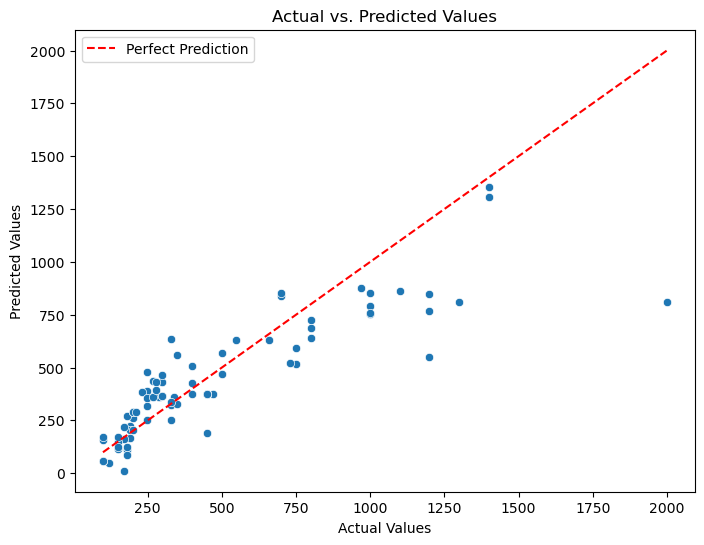

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test (actual values) and y_pred (predicted values) from your model

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a line representing perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### **Decision Tree**

In [17]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


In [18]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

grid_decision = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=5, verbose=True)
grid_decision

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             verbose=True)

In [19]:
grid_decision.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             verbose=True)

In [20]:
# Predict prices using the best model.
y_pred_decision = grid_decision.best_estimator_.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# Evaluate model performance using R2 score.
print(f"R2 Score : {r2_score(y_test,y_pred_decision)}")
# Evaluate model performance using Mean Absolute Error
print(f"MAE : {mean_absolute_error(y_test,y_pred_decision)}")

# Evaluate model performance using Mean Absolute Percentage Error.
print(f"MAPE : {mean_absolute_percentage_error(y_test,y_pred_decision)}")
# Evaluate model performance using Mean Squared Error.
print(f"MSE : {mean_squared_error(y_test,y_pred_decision)}")

R2 Score : 0.6898520761175767
MAE : 122.52333636006237
MAPE : 0.23447705205530328
MSE : 46055.37234236865


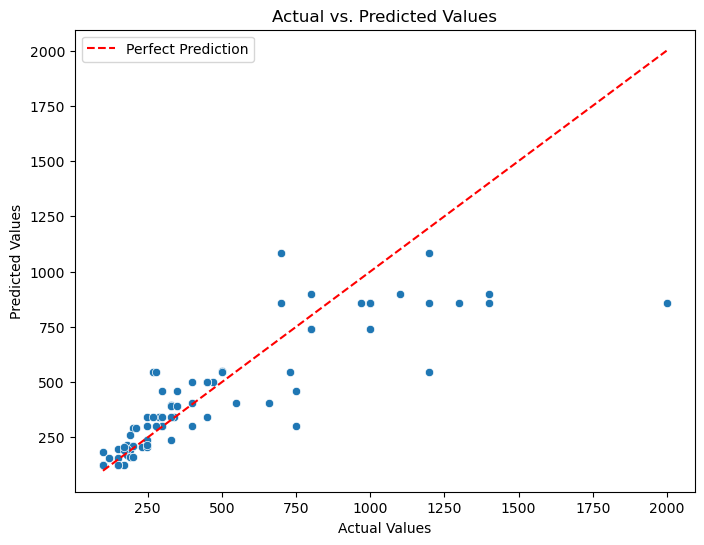

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test (actual values) and y_pred (predicted values) from your model

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x=y_test, y=y_pred_decision)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a line representing perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add a legend
plt.legend()

# Show the plot
plt.show()

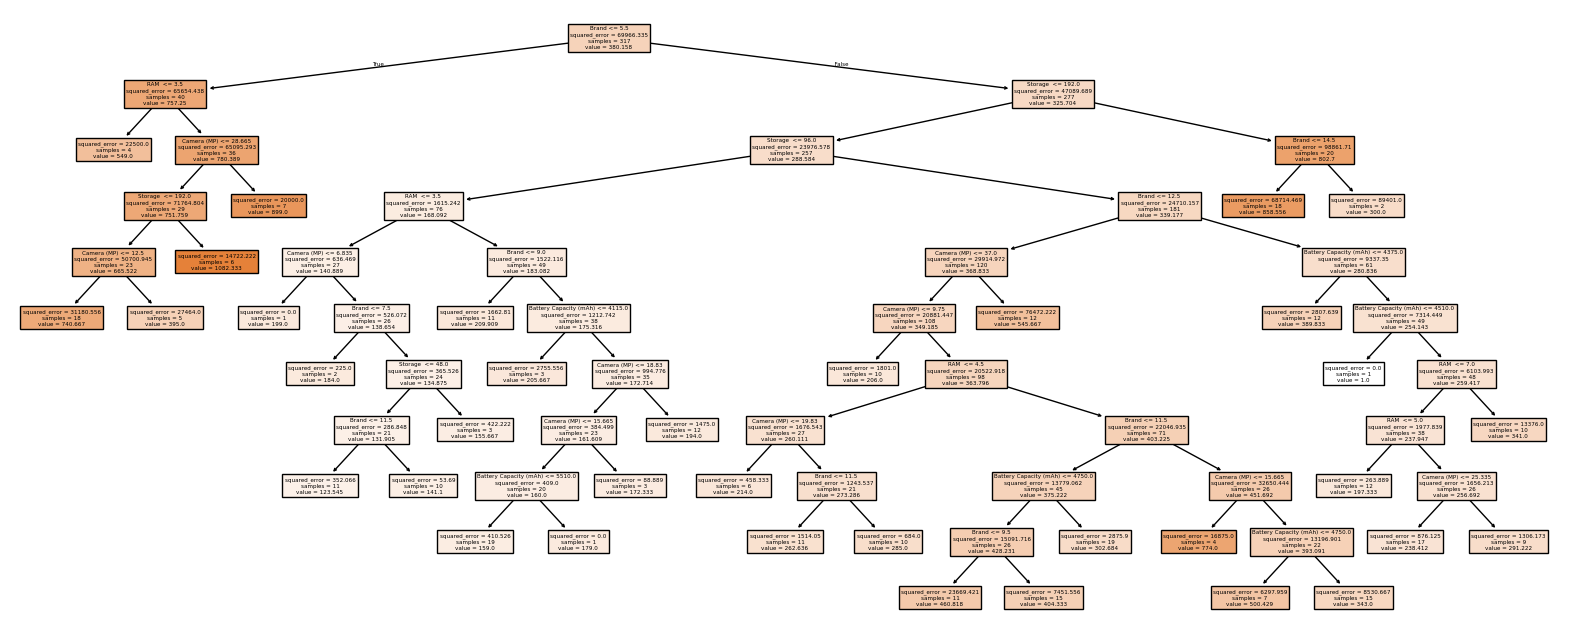

In [22]:
from sklearn import tree

plt.figure(figsize=(20,8))
tree.plot_tree(grid_decision.best_estimator_,filled=True,feature_names=X.columns)
plt.show()